# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv('df_pronto.csv')

In [3]:
df.shape

(16650, 17)

In [4]:
df.shape[0] * 70/100

11655.0

In [5]:
df.head()

,Unnamed: 0,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y
0,0,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False,True,True,True
1,1,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False,False,False,True
2,2,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False,False,False,True
3,3,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False,True,True,True
4,4,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False,False,True,False


In [6]:
df_treino = df.iloc[0:11655,1:17]

In [7]:
df_treino.tail()

,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y
11650,0,Commercial associate,Higher education,Single / not married,House / apartment,28.764384,1.493151,1,0,0,1,1.0,True,True,False,True
11651,0,Commercial associate,Higher education,Single / not married,House / apartment,28.764384,1.493151,1,0,0,1,1.0,True,True,False,True
11652,0,Commercial associate,Higher education,Single / not married,House / apartment,28.764384,1.493151,1,0,0,1,1.0,True,True,False,True
11653,0,Commercial associate,Higher education,Single / not married,House / apartment,28.764384,1.493151,1,0,0,1,1.0,True,True,False,True
11654,0,Commercial associate,Higher education,Single / not married,House / apartment,28.764384,1.493151,1,0,0,1,1.0,False,True,False,True


In [8]:
df_valid = df.iloc[11655:, 1:17]

### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

#### 1. Defina um objeto com a função da árvore de decisão vista em aula.

In [9]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11655 entries, 0 to 11654
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   qtd_filhos             11655 non-null  int64  
 1   tipo_renda             11655 non-null  object 
 2   educacao               11655 non-null  object 
 3   estado_civil           11655 non-null  object 
 4   tipo_residencia        11655 non-null  object 
 5   idade                  11655 non-null  float64
 6   tempo_emprego          11655 non-null  float64
 7   possui_celular         11655 non-null  int64  
 8   possui_fone_comercial  11655 non-null  int64  
 9   possui_fone            11655 non-null  int64  
 10  possui_email           11655 non-null  int64  
 11  qt_pessoas_residencia  11655 non-null  float64
 12  mau                    11655 non-null  bool   
 13  sexo_M                 11655 non-null  bool   
 14  posse_de_veiculo_Y     11655 non-null  bool   
 15  po

In [10]:
clf = DecisionTreeClassifier(random_state=100)

In [11]:
y_t = df_treino.mau.astype(int)

In [12]:
x_t = df_treino[["possui_celular","possui_fone_comercial", "possui_fone", "possui_email", "sexo_M", "posse_de_veiculo_Y", "posse_de_imovel_Y"]].astype(int)

In [13]:
x_t.head()

,possui_celular,possui_fone_comercial,possui_fone,possui_email,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y
0,1,0,0,0,1,1,1
1,1,0,1,1,0,0,1
2,1,0,1,1,0,0,1
3,1,1,1,1,1,1,1
4,1,0,0,0,0,1,0


In [14]:
y_t.head()

0    0
1    0
2    0
3    0
4    0
Name: mau, dtype: int32

#### 2) Treine o modelo com os dados que você separou para treinamento.

Como visto na tarefa passada, as melhores variáveis pra definir ``mau=1`` ou ``mau=0`` são ``possui_email``  e ``posse_de_veiculo`` <br>
Vou usar para o treino inicalmente somete a váriavel e ``posse_de_veiculo`` 

In [15]:
clf.fit(x_t[["posse_de_veiculo_Y"]], y_t)

DecisionTreeClassifier(random_state=100)

#### 3) Visualize a árvore. Talvez você queira aumentar um pouco a figura.

In [16]:
x_t.posse_de_veiculo_Y.value_counts()

posse_de_veiculo_Y
0    7132
1    4523
Name: count, dtype: int64

In [17]:
y_t.value_counts()

mau
0    11529
1      126
Name: count, dtype: int64

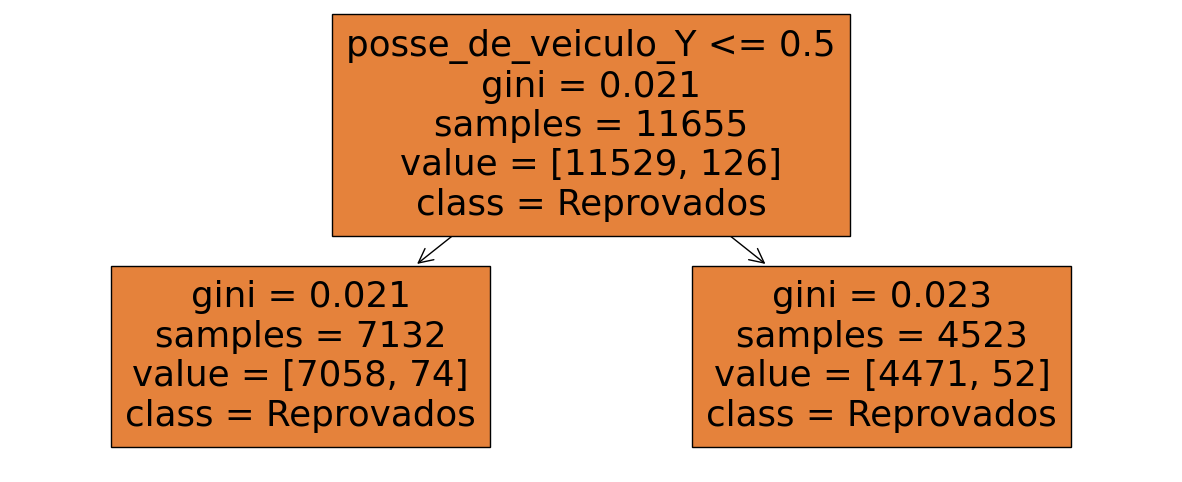

In [18]:
plt.figure(figsize=(15, 6))
plot_tree(clf,
          filled=True,
          class_names=["Reprovados", "Aprovados"],
          feature_names=['posse_de_veiculo_Y']);

Não sei se fiz correto, mas fui estudar sobre como o gini influencia na árvore, e quanto mais próximo de 0.0 significa que a distribuição da árvore é tendenciosa, isso pode ser visto com ``y_t.value_counts()``

In [19]:
y_t.value_counts()

mau
0    11529
1      126
Name: count, dtype: int64

E como nossa variável alvo posssui uma má distribuição eu acredito que a árvore tende a retornar "Reprovado"

In [20]:
clf.fit(x_t, y_t)

DecisionTreeClassifier(random_state=100)

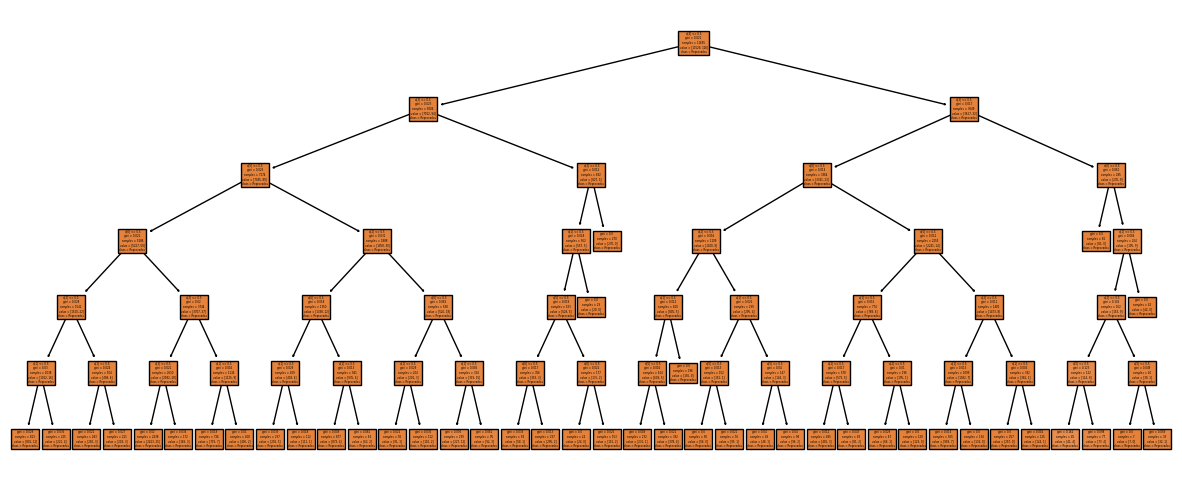

In [21]:
plt.figure(figsize=(15, 6))
plot_tree(clf,
          filled=True,
          class_names=["Reprovados", "Aprovados"],
          #feature_names=['posse_de_veiculo_Y']
         );

#### 4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.

In [22]:
x_t.head()

,possui_celular,possui_fone_comercial,possui_fone,possui_email,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y
0,1,0,0,0,1,1,1
1,1,0,1,1,0,0,1
2,1,0,1,1,0,0,1
3,1,1,1,1,1,1,1
4,1,0,0,0,0,1,0


In [23]:
y_t.head()

0    0
1    0
2    0
3    0
4    0
Name: mau, dtype: int32

In [24]:
predict = clf.predict(x_t)

In [25]:
cm = confusion_matrix(y_t, predict)

In [26]:
disp = ConfusionMatrixDisplay(cm)

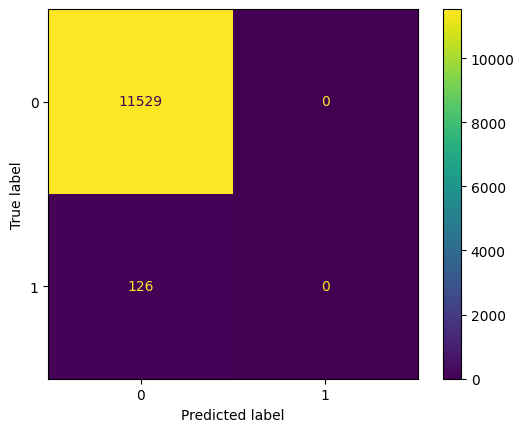

In [27]:
disp.plot()

#### 5. Calcule a acurácia na base de treinamento

In [28]:
accuracy_score(predict, y_t)

0.9891891891891892